In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import autorootcwd
import torch
import madmom
import os
from madmom.features.beats import RNNBeatProcessor, DBNBeatTrackingProcessor

In [6]:
# Functions
def get_filenames(dir: str = "data/processed/audio") -> list:
    """
    Get a list of filenames in a directory.

    Args:
        directory (str): The directory to get the filenames from.

    Returns:
        filenames (list): A list of filenames in the directory.
    """
    filenames = os.listdir(dir)
    filenames = [
        filename.split(".")[0] for filename in filenames if filename.endswith(".mp3")
    ]
    return filenames

In [ ]:
# 1. Create your processor objects.
# The RNNBeatProcessor transforms audio into beat activation values.
act_proc = RNNBeatProcessor()  # By default, uses pre-trained RNN for beat activations.

# The DBNBeatTrackingProcessor converts those activations into beat timestamps.
beat_proc = DBNBeatTrackingProcessor(fps=100)  
# fps=100 is typical for madmom's RNN output; you can adjust if needed.

# 2. Run the processor on an audio file (MP3 or WAV).
fname = get_filenames()[0]
activations = act_proc(f'./data/processed/audio/{fname}.mp3')

# 3. Compute the actual beat positions from activations.
beats = beat_proc(activations)

# 4. "beats" is now a NumPy array of timestamps.
print("Detected beats (seconds):", beats)


FileNotFoundError: [Errno 2] No such file or directory: './data/processed/audio/example.mp3'

Detected beats (seconds): [1.7000e-01 5.7000e-01 9.9000e-01 1.3800e+00 1.7800e+00 2.1900e+00
 2.5800e+00 2.9700e+00 3.3700e+00 3.7800e+00 4.1900e+00 4.5800e+00
 4.9800e+00 5.3900e+00 5.7900e+00 6.1900e+00 6.5700e+00 6.9800e+00
 7.3900e+00 7.7900e+00 8.1800e+00 8.5900e+00 8.9800e+00 9.3700e+00
 9.7600e+00 1.0150e+01 1.0560e+01 1.0950e+01 1.1360e+01 1.1750e+01
 1.2140e+01 1.2540e+01 1.2930e+01 1.3310e+01 1.3700e+01 1.4080e+01
 1.4450e+01 1.4840e+01 1.5230e+01 1.5630e+01 1.6030e+01 1.6410e+01
 1.6780e+01 1.7160e+01 1.7530e+01 1.7930e+01 1.8310e+01 1.8680e+01
 1.9060e+01 1.9450e+01 1.9820e+01 2.0200e+01 2.0580e+01 2.0970e+01
 2.1350e+01 2.1720e+01 2.2090e+01 2.2480e+01 2.2860e+01 2.3230e+01
 2.3600e+01 2.3980e+01 2.4350e+01 2.4700e+01 2.5070e+01 2.5440e+01
 2.5830e+01 2.6200e+01 2.6570e+01 2.6950e+01 2.7330e+01 2.7690e+01
 2.8070e+01 2.8450e+01 2.8820e+01 2.9190e+01 2.9570e+01 2.9950e+01
 3.0320e+01 3.0690e+01 3.1060e+01 3.1430e+01 3.1820e+01 3.2190e+01
 3.2570e+01 3.2940e+01 3.3330e+01 3.

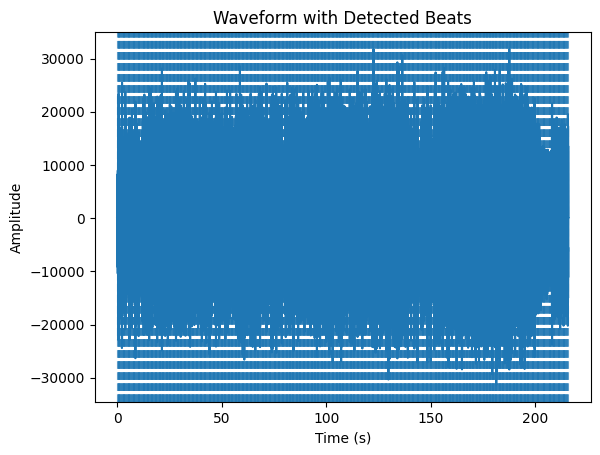

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# madmom utility to load audio
from madmom.audio.signal import Signal

# 1. RNNBeatProcessor -> beat activation
from madmom.features.beats import RNNBeatProcessor
# 2. DBNBeatTrackingProcessor -> actual beat times
from madmom.features.beats import DBNBeatTrackingProcessor

# Example file
# 2. Run the processor on an audio file (MP3 or WAV).
fname = get_filenames()[0]
audio_path = f'./data/processed/audio/{fname}.mp3'

# --- STEP A: load audio for plotting ---
# Set num_channels=1 to ensure a single channel (mono)
# sample_rate is auto-detected from the file
signal = Signal(audio_path, num_channels=1)

# We'll extract the raw audio samples and the sample rate
audio_samples = signal
sr = signal.sample_rate

# Prepare a time axis for plotting, in seconds
times = np.arange(len(audio_samples)) / float(sr)

# --- STEP B: process for beats ---
# Create the processor objects
act_proc = RNNBeatProcessor()  # or specify your own model path if needed
beat_proc = DBNBeatTrackingProcessor(fps=100)

# Extract activations
activations = act_proc(audio_path)
# Convert activations to beat timestamps (in seconds)
beats = beat_proc(activations)
print("Detected beats (seconds):", beats)

# --- STEP C: plot waveform + beats ---
plt.figure()

# Plot the waveform over time
plt.plot(times, audio_samples, label="Audio waveform")

# Overlay a vertical line at each beat time
for b in beats:
   plt.axvline(x=b, linestyle='--', alpha=0.7)  # no color specified

plt.title("Waveform with Detected Beats")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()